## Ana CNN

In [1]:
%matplotlib inline 
#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import random            as random
import numpy             as np
import pandas            as pd
#import tables            as tb
import matplotlib.pyplot as plt
import os 

In [3]:
import xyimg.dataprep as dp
import xyimg.cnn      as cnn

In [4]:
ipath  = os.environ['LPRDATADIR']+'cnn/'

pressure   = '13bar'
projection = ('x', 'y')
widths     = (10, 10)
frame      = dp.frames[pressure]
labels     = ['esum']
_, ifile   = cnn.get_cnn_filenames(pressure, projection, widths, labels)
print(ifile)


/cnn_esum_xymm_13bar_xy_10x10_100.npz


## RoC esum widths

In [6]:
def roc_widths(pressure, widths, labels, rejection = 0.9):
    ydir, ypdir  = {}, {}
    plt.figure()
    for width in widths:
        _ , ifile   = cnn.get_cnn_filenames(pressure, projection, width, labels)
        cnndata     = np.load(ipath + ifile)
        name = dp.str_concatenate(width, 'x')
        ydir[name]  = cnndata['y'] .flatten()
        ypdir[name] = cnndata['yp'].flatten()
        y, yp  = dir[name], ypdir[name]
        yr, ys = cnn.roc_vals(y, yp)
        eff    = cnn.roc_value(y, yp, rejection)
        print('sample ', pressure, width, labels, ' rejection ', rejection, ', efficiency ', eff)
        plt.plot(yr, ys, label = name, lw = 2)
        plt.xlim((rejection, 1.))
        plt.legend()
    plt.grid()
    plt.xlabel('rejection'); plt.ylabel('efficiency');
    plt.title(pressure);
    slabels = dp.str_concatenate(labels, 'x')
    sname   = dp.str_concatenate(('img/roc_widths_', slabels, pressure), '_') + '.png'
    print('save figure at ', sname)
    plt.savefig(sname)


save figure at  img/roc_widths__esum_20bar.png
save figure at  img/roc_widths__esum_13bar.png
save figure at  img/roc_widths__esum_5bar.png
save figure at  img/roc_widths__esum_2bar.png
save figure at  img/roc_widths__esum_1bar.png


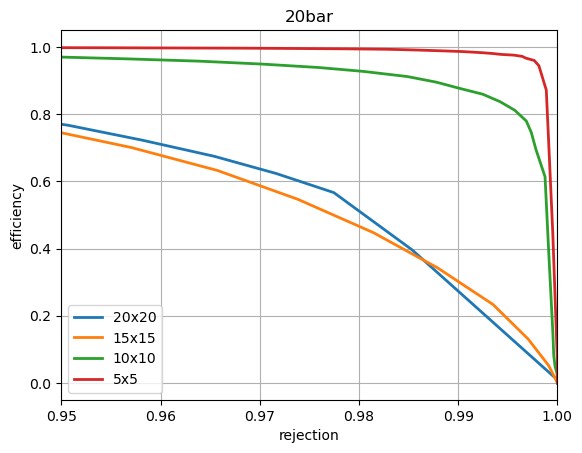

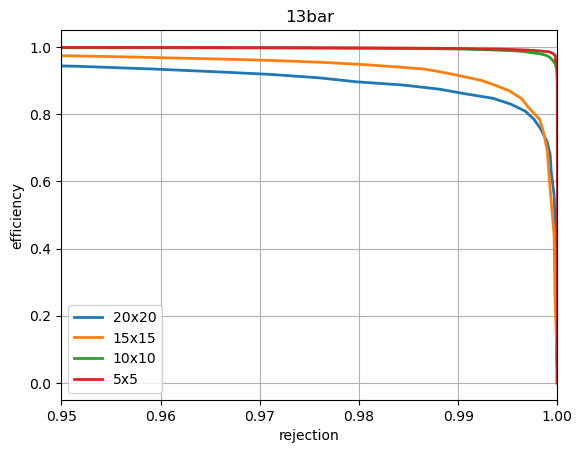

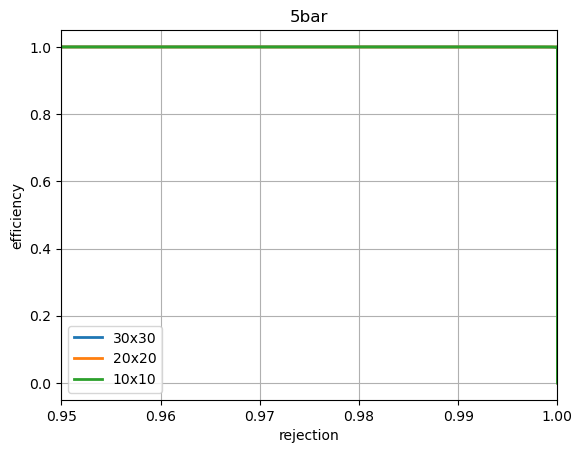

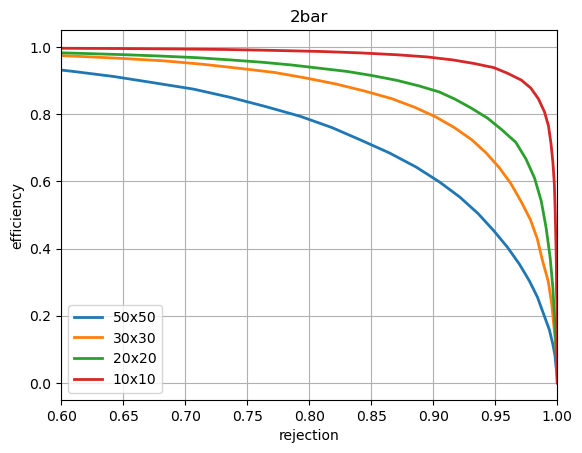

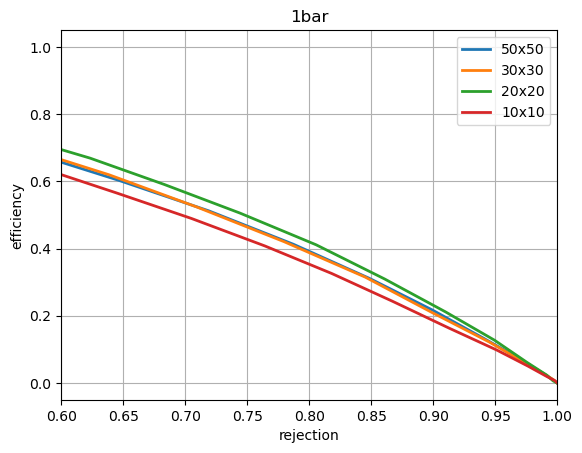

In [7]:
labels = ['esum']
pressure = '20bar'
widths   = ((20, 20), (15, 15), (10, 10), (5, 5))
roc_widths(pressure, widths, labels, 0.95)
pressure = '13bar'
roc_widths(pressure, widths, labels, 0.95)
pressure = '5bar'
widths   = ((30, 30), (20, 20), (10, 10))
roc_widths(pressure, widths, labels, 0.95)
widths   = ((50, 50), (30, 30), (20, 20), (10, 10))
pressure = '2bar'
roc_widths(pressure, widths, labels, 0.60)
pressure = '1bar'
roc_widths(pressure, widths, labels, 0.60)


In [15]:
def eff_at_rej(pressure, width, labels, rejection = 0.9):
    _ , ifile   = cnn.get_cnn_filenames(pressure, projection, width, labels)
    cnndata     = np.load(ipath + ifile)
    y  = cnndata['y'] .flatten()
    yp = cnndata['yp'].flatten()
    eff    = cnn.roc_value(y, yp, rejection)
    print('sample :', pressure, width, labels, '\t rejection {:2.2f}, efficiency {:2.2f}'.format(100*rejection, 100*eff[1]))


In [18]:
for rej in (0.99, 0.999, 0.9999):
    labels = ['esum']
    pressure = '20bar'
    widths   = ((20, 20), (15, 15), (10, 10), (5, 5))
    for w in widths:
        eff_at_rej(pressure, w, labels, rej)
    pressure = '13bar'
    for w in widths:
        eff_at_rej(pressure, w, labels, rej)
    pressure = '5bar'
    widths   = ((30, 30), (20, 20), (10, 10))
    for w in widths:
        eff_at_rej(pressure, w, labels, rej)

sample : 20bar (20, 20) ['esum'] 	 rejection 99.00, efficiency 32.99
sample : 20bar (15, 15) ['esum'] 	 rejection 99.00, efficiency 30.38
sample : 20bar (10, 10) ['esum'] 	 rejection 99.00, efficiency 87.78
sample : 20bar (5, 5) ['esum'] 	 rejection 99.00, efficiency 98.67
sample : 13bar (20, 20) ['esum'] 	 rejection 99.00, efficiency 86.69
sample : 13bar (15, 15) ['esum'] 	 rejection 99.00, efficiency 91.61
sample : 13bar (10, 10) ['esum'] 	 rejection 99.00, efficiency 99.38
sample : 13bar (5, 5) ['esum'] 	 rejection 99.00, efficiency 99.53
sample : 5bar (30, 30) ['esum'] 	 rejection 99.00, efficiency 100.00
sample : 5bar (20, 20) ['esum'] 	 rejection 99.00, efficiency 99.98
sample : 5bar (10, 10) ['esum'] 	 rejection 99.00, efficiency 100.00
sample : 20bar (20, 20) ['esum'] 	 rejection 99.90, efficiency 32.99
sample : 20bar (15, 15) ['esum'] 	 rejection 99.90, efficiency 5.92
sample : 20bar (10, 10) ['esum'] 	 rejection 99.90, efficiency 50.49
sample : 20bar (5, 5) ['esum'] 	 rejecti

| | | | |
| :--: | :--: 

## RoC colors

In [36]:
def roc_colors(pressure, widths, colors, rejection = 0.9):
    ydir, ypdir  = {}, {}
    plt.figure()
    for labels in colors:
        _ , ifile   = cnn.get_cnn_filenames(pressure, projection, widths, labels)
        cnndata     = np.load(ipath + ifile)
        name        = dp.str_concatenate(labels, '+')
        ydir[name]  = cnndata['y'] .flatten()
        ypdir[name] = cnndata['yp'].flatten()
        yr, ys = cnn.roc_vals(ydir[name], ypdir[name])
        plt.plot(yr, ys, label = name, lw = 2)
        plt.xlim((rejection, 1.))
        plt.legend()
    plt.grid()
    plt.xlabel('rejection'); plt.ylabel('efficiency');
    plt.title(pressure);
    swidths = dp.str_concatenate(widths, 'x')
    sname   = dp.str_concatenate(('img/roc_colors_', pressure, swidths), '_') + '.png'
    print('save figure at ', sname)
    plt.savefig(sname)


save figure at  img/roc_colors__13bar_10x10.png


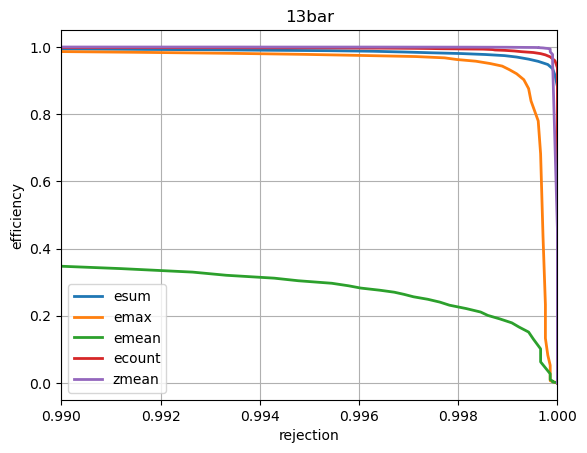

In [37]:
pressure = '13bar'
colors   = [['esum'], ['emax'], ['emean'], ['ecount'], ['zmean']]
widths   = (10, 10)
roc_colors(pressure, widths, colors, 0.99)

## Ana Test and Seg Images

In [53]:
def roc_test(pressures, widths, labels, rejection = 0.9):
    ydir, ypdir  = {}, {}
    plt.figure()
    for pressure in pressures:
        _ , ifile   = cnn.get_cnn_filenames(pressure, projection, widths, labels)
        cnndata     = np.load(ipath + ifile)
        name        = pressure
        ydir[name]  = cnndata['y'] .flatten()
        ypdir[name] = cnndata['yp'].flatten()
        yr, ys = cnn.roc_vals(ydir[name], ypdir[name])
        plt.plot(yr, ys, label = name, lw = 2, alpha = 0.8)
        plt.xlim((rejection, 1.))
        plt.legend()
    plt.grid()
    plt.xlabel('rejection'); plt.ylabel('efficiency');
    slabels = dp.str_concatenate(labels, '+')
    swidths = dp.str_concatenate(widths, 'x')
    title   = dp.str_concatenate((swidths, slabels), '_')
    plt.title(title);
    sname   = dp.str_concatenate(('img/roc_test_', title), '_') + '.png'
    print('save figure at ', sname)
    plt.savefig(sname)


save figure at  img/roc_test__10x10_seg.png


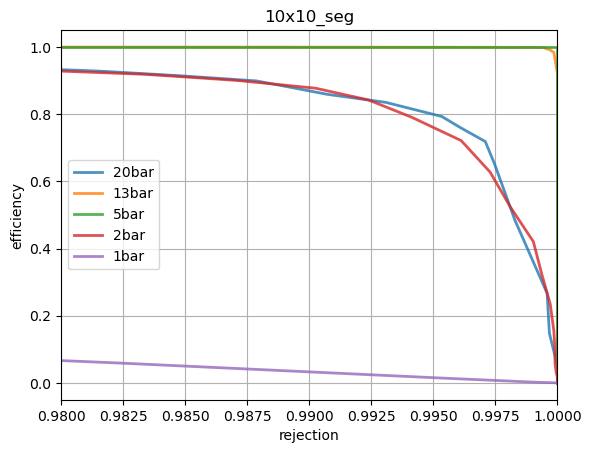

In [54]:
pressures = ('20bar', '13bar', '5bar', '2bar', '1bar')
widths    = (10, 10)
labels    = ['seg']
roc_test(pressures, widths, labels, 0.98)

save figure at  img/roc_test__10x10_test.png


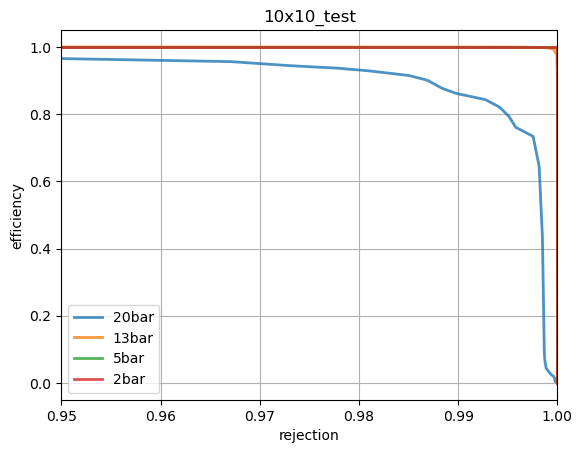

In [56]:
pressures = ('20bar', '13bar', '5bar', '2bar')
widths    = (10, 10)
labels    = ['test']
roc_test(pressures, widths, labels, 0.95)